# Test influence of initialization on nonlinear sliding step

We want to understand the influence of the initialization on the nonlinear sliding step, i.e. does initializing with the solution of the linear problem really help?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import product

from pointscat.forward_problem import angle_to_vec, PointScatteringProblem, compute_far_field
from pointscat.inverse_problem import unif_sample_disk, DiscreteMeasure, solve_blasso


np.random.seed(0)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
amplitudes = np.array([0.5, 2, 1])
locations = np.array([[-3.3, -3.7], [-2.8, 3.5], [3.2, 2.6]])
wave_number = 1
point_scat = PointScatteringProblem(locations, amplitudes, wave_number)

In [3]:
def plot_result(locations, amplitudes, estimated_measure, box_size):
    fig = plt.figure(figsize=(5, 5))

    ax = fig.add_subplot(1, 1, 1, projection='3d')

    markerline, stemlines, baseline = ax.stem(locations[:, 0], locations[:, 1], amplitudes)

    stemlines.set_color('black')
    markerline.set_color('black')
    baseline.set_linestyle('none')

    markerline, stemlines, baseline = ax.stem(estimated_measure.locations[:, 0],
                                              estimated_measure.locations[:, 1],
                                              estimated_measure.amplitudes)

    stemlines.set_color('red')
    markerline.set_color('red')
    baseline.set_linestyle('none')

    ax.set_xlim(-1.1*box_size/2, 1.1*box_size/2)
    ax.set_ylim(-1.1*box_size/2, 1.1*box_size/2)

    fig.tight_layout()
    plt.show()

In [4]:
box_size = 10  # locations should belong to (-box_size/2,box_size/2)
num_frequencies = 50
cutoff_frequency = 2 * wave_number
frequencies = unif_sample_disk(num_frequencies, cutoff_frequency)

incident_angles = np.array([np.pi + np.angle(k[0]+1j*k[1]) - np.arccos(np.linalg.norm(k)/(2*wave_number))
                            for k in frequencies])
observation_directions = np.array([np.angle(k[0]+1j*k[1]) + np.arccos(np.linalg.norm(k)/(2*wave_number))
                                   for k in frequencies])

far_field = point_scat.compute_far_field(incident_angles, observation_directions)
far_field_born = point_scat.compute_far_field(incident_angles, observation_directions, born_approx=True)
obs = np.concatenate([np.real(far_field), -np.imag(far_field)])

In [5]:
print(np.linalg.norm(far_field - far_field_born) / np.linalg.norm(far_field))

0.1174603913446973


### Init with four spikes

In [6]:
x_tab = np.linspace(-box_size/2, box_size/2, 2)
init_locations = np.array([[x_1, x_2] for (x_1, x_2) in product(x_tab, x_tab)])
init_amplitudes = np.ones(len(init_locations))
estimated_measure = DiscreteMeasure(init_locations, init_amplitudes)

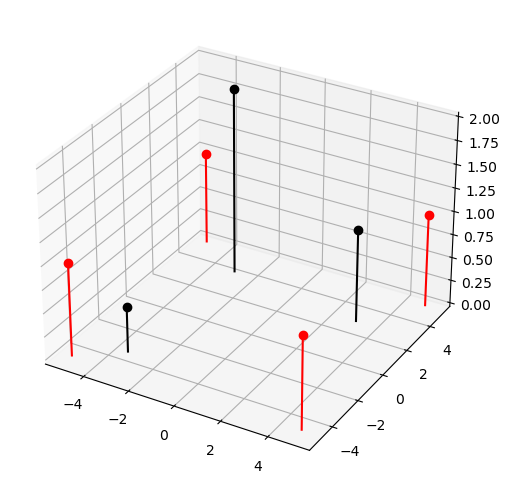

In [7]:
plot_result(locations, amplitudes, estimated_measure, box_size)

In [8]:
estimated_measure.perform_nonlinear_sliding(incident_angles, observation_directions, obs, wave_number, box_size,
                                            tol_locations=0.1, tol_amplitudes=0.01);

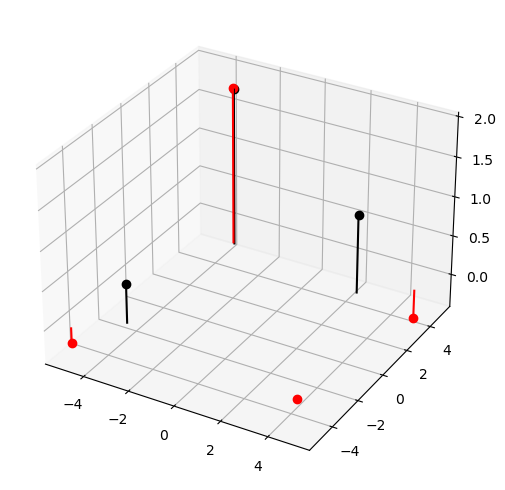

In [9]:
plot_result(locations, amplitudes, estimated_measure, box_size)

### Init with nine spikes

In [10]:
x_tab = np.linspace(-box_size/2, box_size/2, 3)
init_locations = np.array([[x_1, x_2] for (x_1, x_2) in product(x_tab, x_tab)])
init_amplitudes = np.ones(len(init_locations))
estimated_measure = DiscreteMeasure(init_locations, init_amplitudes)

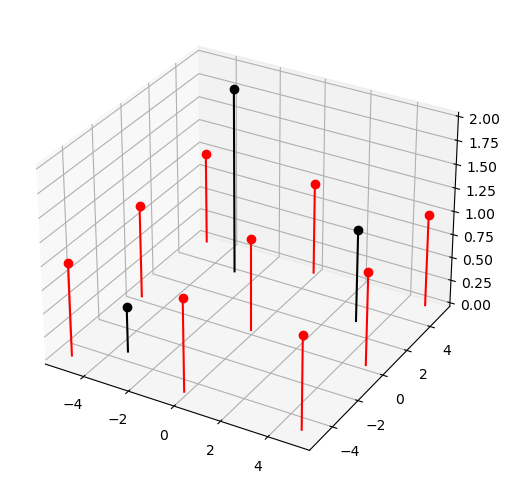

In [11]:
plot_result(locations, amplitudes, estimated_measure, box_size)

In [12]:
estimated_measure.perform_nonlinear_sliding(incident_angles, observation_directions, obs, wave_number, box_size,
                                            tol_locations=0.1, tol_amplitudes=0.01);

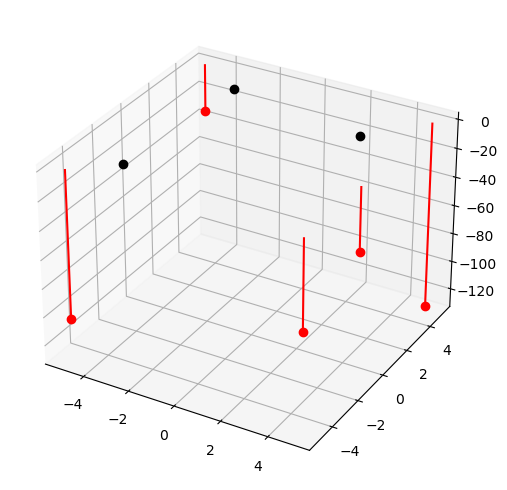

In [13]:
plot_result(locations, amplitudes, estimated_measure, box_size)